In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve,accuracy_score,classification_report,f1_score,precision_score,recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore,skew

import warnings
warnings.filterwarnings('ignore')

1. Problem Statement
2. Data Gathering

In [13]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


3. EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
df['Species'].value_counts().to_dict()

{'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50}

In [12]:
df['Species'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2},inplace=True)

In [13]:
df['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

<Axes: >

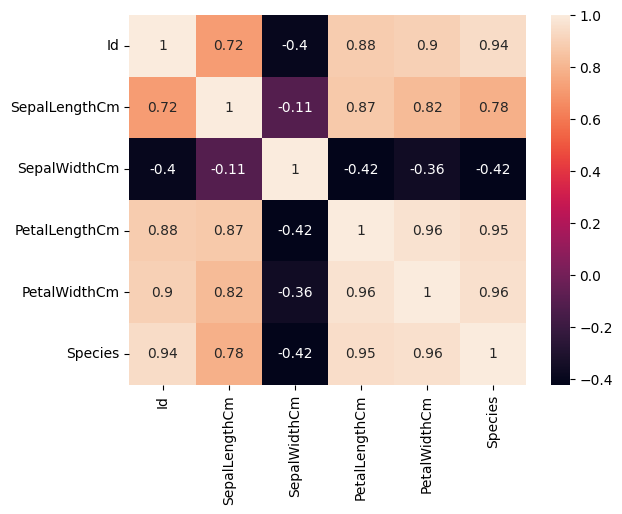

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
vif_list = []
for i in range(df.shape[1]-1):
    vif = variance_inflation_factor(df.to_numpy(),i)
    print(f'VIF of {df.columns[i]} >>',vif)
    vif_list.append(vif)

VIF of Id >> 35.251958687805306
VIF of SepalLengthCm >> 273.34471282593984
VIF of SepalWidthCm >> 97.54434474866333
VIF of PetalLengthCm >> 194.19877339973303
VIF of PetalWidthCm >> 71.0850476870251


4. Feature Engineeering:- '''
> If null values present then we need to fill them
>> Also we need to deal with outliers
'''/

<Axes: xlabel='SepalWidthCm', ylabel='Density'>

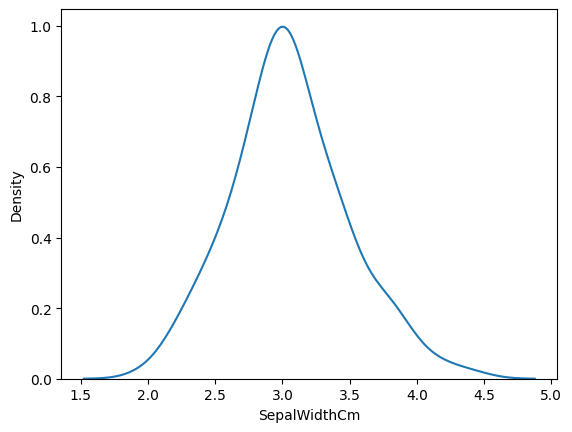

In [16]:
sns.kdeplot(df['SepalWidthCm'])

In [17]:
df['PetalLengthCm'].skew()

-0.27446425247378287

In [18]:
b = []
a = df.columns.to_list()
for i in a:
    b.append(df[a].skew())
    break
print(b)    #As seen all are symmetrically distributed hence we will use zscore method

[Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
Species          0.000000
dtype: float64]


<Axes: xlabel='SepalWidthCm'>

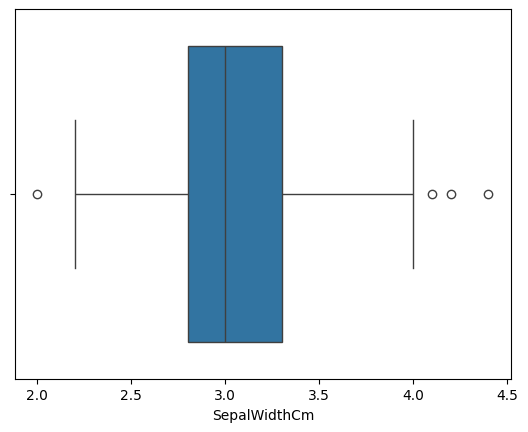

In [19]:
# p = df['PetalLengthCm'].to_numpy()
# # q = []
# for i in p:
#     z_score = zscore(i)
sns.boxplot(x=df['SepalWidthCm'])

In [20]:
k = df['SepalWidthCm'].to_numpy()

In [21]:
a = zscore(k)
b = np.where(a>3,1,a)
print(b)

[ 1.03205722 -0.1249576   0.33784833  0.10644536  1.26346019  1.95766909
  0.80065426  0.80065426 -0.35636057  0.10644536  1.49486315  0.80065426
 -0.1249576  -0.1249576   2.18907205  1.          1.95766909  1.03205722
  1.72626612  1.72626612  0.80065426  1.49486315  1.26346019  0.56925129
  0.80065426 -0.1249576   0.80065426  1.03205722  0.80065426  0.33784833
  0.10644536  0.80065426  2.42047502  2.65187798  0.10644536  0.33784833
  1.03205722  0.10644536 -0.1249576   0.80065426  1.03205722 -1.74477836
  0.33784833  1.03205722  1.72626612 -0.1249576   1.72626612  0.33784833
  1.49486315  0.56925129  0.33784833  0.33784833  0.10644536 -1.74477836
 -0.58776353 -0.58776353  0.56925129 -1.51337539 -0.35636057 -0.8191665
 -2.43898725 -0.1249576  -1.97618132 -0.35636057 -0.35636057  0.10644536
 -0.1249576  -0.8191665  -1.97618132 -1.28197243  0.33784833 -0.58776353
 -1.28197243 -0.58776353 -0.35636057 -0.1249576  -0.58776353 -0.1249576
 -0.35636057 -1.05056946 -1.51337539 -1.51337539 -0.8

5.Feature Selection

In [22]:
'''
1. Filter method
2. Wrapper Method
3. Embedded Method
'''

'\n1. Filter method\n2. Wrapper Method\n3. Embedded Method\n'

6. Model Training
> A] Train Test Split

In [23]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [14]:
df = df.drop('Id',axis=1)
x = df.drop('Species',axis=1)
y = df['Species']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

> B] Model Selection

In [26]:
model = LogisticRegression(multi_class='ovr')
model.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [27]:
# Testing
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
print('*'*80)

# F1_Score = f1_score(y_test,y_pred)
# print(F1_Score)
# print('*'*80)

clf_report = classification_report(y_test,y_pred)
print('classification_report is:\n',clf_report)
print('*'*80)

conf_mat = confusion_matrix(y_test,y_pred)
print('Confusion Matrix is:\n',conf_mat)
print('*'*80)

0.9333333333333333
********************************************************************************
classification_report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.80      0.89        10
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

********************************************************************************
Confusion Matrix is:
 [[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]
********************************************************************************


In [28]:
# Training

y_train_pred = model.predict(x_train)

accuracy = accuracy_score(y_train,y_train_pred)
print(accuracy)
print('*'*80)

# F1_Score = f1_score(y_train,y_train_pred)
# print(F1_Score)
# print('*'*80)

clf_report = classification_report(y_train,y_train_pred)
print('classification_report is:\n',clf_report)
print('*'*80)

conf_mat = confusion_matrix(y_train,y_train_pred)
print('Confusion Matrix is:\n',conf_mat)
print('*'*80)

0.95
********************************************************************************
classification_report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      0.90      0.92        40
           2       0.90      0.95      0.93        40

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120

********************************************************************************
Confusion Matrix is:
 [[40  0  0]
 [ 0 36  4]
 [ 0  2 38]]
********************************************************************************


In [29]:
model.score(x_train,y_train)

0.95

In [30]:
import pickle
with open('Iris.pkl','wb') as f:
    pickle.dump(model,f)

In [31]:
project_data = {'columns': list(x.columns)}
project_data

{'columns': ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']}

In [32]:
import json

In [33]:
with open('project_data.json','w') as f:
    json.dump(project_data,f)

In [34]:
x_train.head(1).T

,8
SepalLengthCm,4.4
SepalWidthCm,2.9
PetalLengthCm,1.4
PetalWidthCm,0.2


In [20]:
SepalLengthCm = 5.6
SepalWidthCm = 2.9
PetalLengthCm = 3.6
PetalWidthCm = 0.2

In [16]:
import numpy as np
test_array = np.zeros(len(x_train.columns))
test_array

array([0., 0., 0., 0.])

In [21]:
test_array[0] = SepalLengthCm
test_array[1] = SepalWidthCm
test_array[2] = PetalLengthCm
test_array[3] = PetalWidthCm
print(test_array)


[5.6 2.9 3.6 0.2]


In [22]:
model.predict([test_array])

array([1], dtype=int64)

In [2]:
import pickle

In [3]:
with open('Iris.pkl','rb') as f:
    model = pickle.load(f)   # Load pickle file

In [7]:
model.columns()

AttributeError: 'LogisticRegression' object has no attribute 'columns'